# Data Science & Business Analytics Tasks

## Exploratory Data Analysis - Retail

Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ , as a business manager, try to find out the weak areas where you can work to make more profit.

Performed by - Prajwal V. Gotmare

In [1]:
# importing libraries and data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

store = pd.read_csv("SampleSuperstore.csv")

In [2]:
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
store.shape

(9994, 13)

In [4]:
store["Ship Mode"].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [5]:
store.Country.nunique(dropna = True)

1

In [6]:
store = store.drop(["Country"],axis=1)

In [7]:
store.Segment.nunique(dropna = True)

3

In [8]:
store["Segment"].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [9]:
store["Postal Code"].value_counts()

10035    263
10024    230
10009    229
94122    203
10011    193
        ... 
33458      1
95616      1
48307      1
61832      1
59102      1
Name: Postal Code, Length: 631, dtype: int64

In [10]:
store = store.drop(["Postal Code"],axis=1)

In [11]:
store.shape

(9994, 11)

In [12]:
store.ndim

2

In [13]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


In [14]:
store.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [15]:
store.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [16]:
store.duplicated().sum()

50

In [17]:
store.drop_duplicates(inplace=True)

In [18]:
store.duplicated().sum()

0

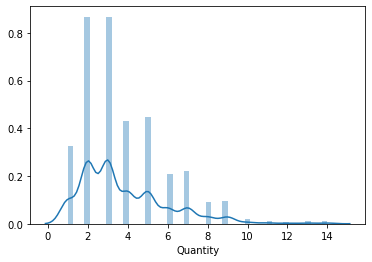

In [19]:
sns.distplot(store["Quantity"])

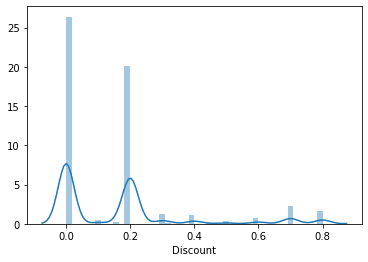

In [20]:
sns.distplot(store["Discount"])

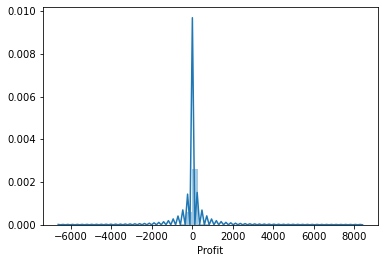

In [21]:
sns.distplot(store["Profit"])

In [22]:
cor1 = store.corr()

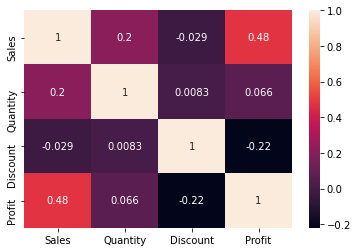

In [23]:
sns.heatmap(cor1, annot = True)

Conclusion : By above heatmap it can be seen that Profit and Sales is highly correlated to each other.

### Scatter-plot

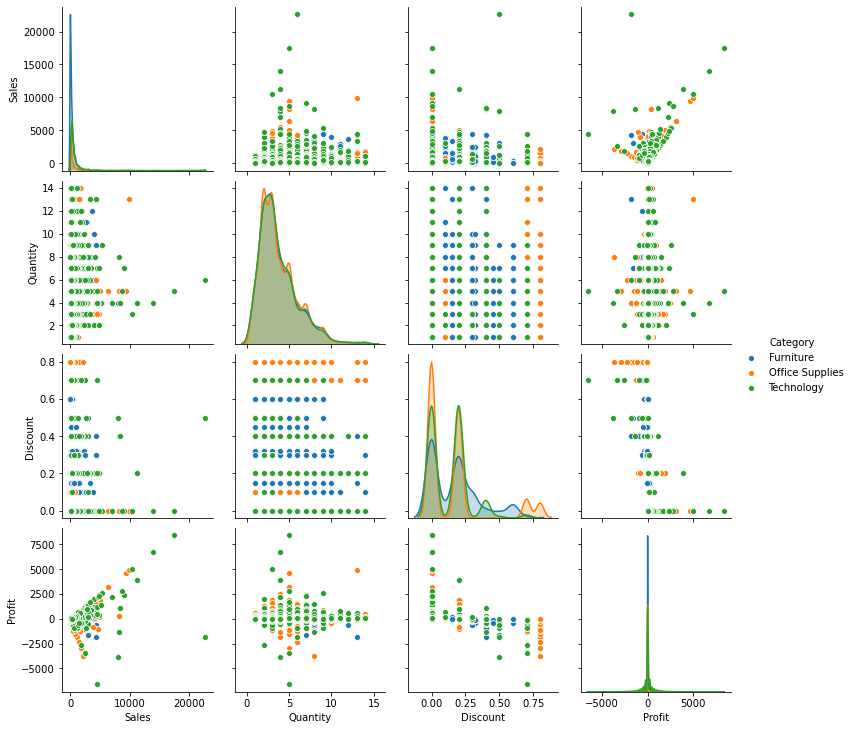

In [24]:
sns.pairplot(store,hue ="Category")

Coclusion : We can't get much sense out of scatter plots so, we have to look for another graphs.

### State vs Profit barplots

In [25]:
sales_profit = store.groupby("State")["Profit"].sum()
sales_profit

State
Alabama                  5786.8253
Arizona                 -3427.9246
Arkansas                 4008.6871
California              76215.9705
Colorado                -6527.8579
Connecticut              3511.4918
Delaware                 9977.3748
District of Columbia     1059.5893
Florida                 -3399.3017
Georgia                 16250.0433
Idaho                     826.7231
Illinois               -12593.2976
Indiana                 18382.9363
Iowa                     1183.8119
Kansas                    836.4435
Kentucky                11199.6966
Louisiana                2196.1023
Maine                     454.4862
Maryland                 7031.1788
Massachusetts            6785.5016
Michigan                24428.0903
Minnesota               10823.1874
Mississippi              3172.9762
Missouri                 6436.2105
Montana                  1833.3285
Nebraska                 2037.0942
Nevada                   3316.7659
New Hampshire            1706.5028
New Jersey    

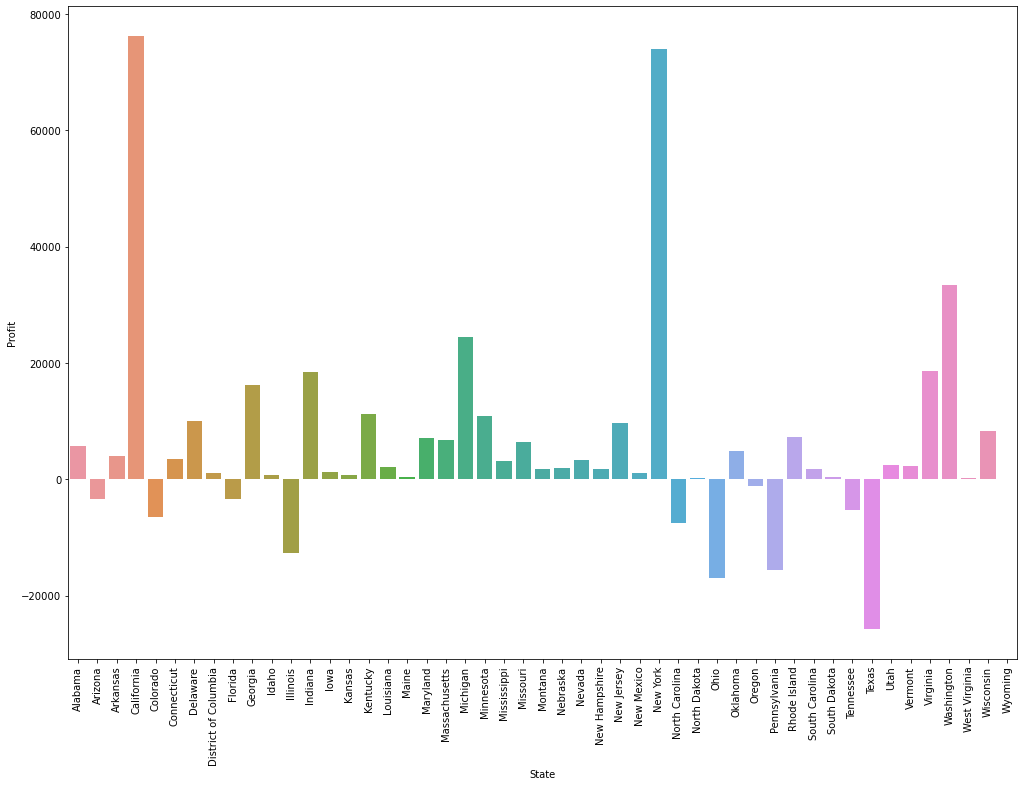

In [26]:
plt.figure(figsize = (17,12))
sns.barplot(x = sales_profit.index, y=sales_profit.values)
plt.ylabel("Profit")
plt.xticks(rotation=90)
plt.show()

Conclusion : It can be easily seen that the state of California and New-york is the highest profit making states in the country
while states like Ohio, Pennsylvania and Texas are the states having the highest losses. 

### Category vs Profit barplots

In [27]:
sales_profit1 = store.groupby("Category")["Profit"].sum()
sales_profit1

Category
Furniture           18484.9459
Office Supplies    122196.0726
Technology         145416.5394
Name: Profit, dtype: float64

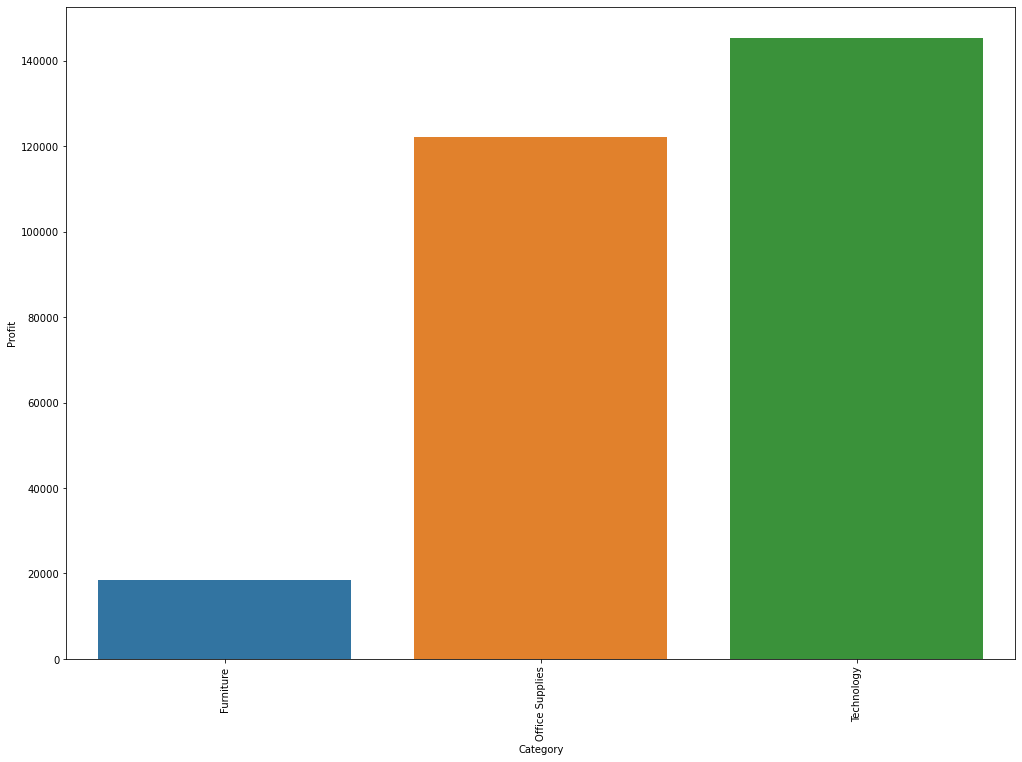

In [28]:
plt.figure(figsize = (17,12))
sns.barplot(x = sales_profit1.index, y=sales_profit1.values)
plt.ylabel("Profit")
plt.xticks(rotation=90)
plt.show()

Conclusion : The categories with highest Profits are Office Supplies and Technology while Furniture category makes low profit.

### Region vs Count barplots

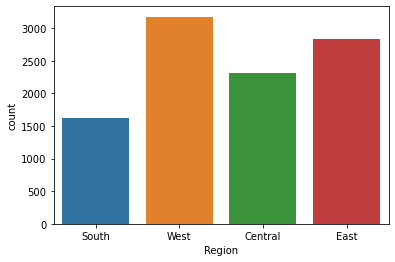

In [29]:
sns.countplot("Region", data=store)

Conclusion : West region is the highest contributor while South region is the lowest contributor to Sales.

### Segment vs Count barplot 

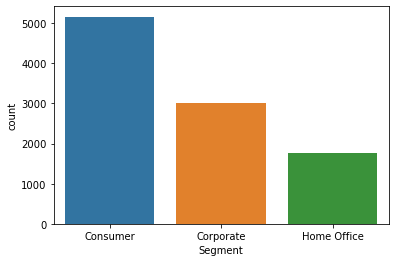

In [30]:
sns.countplot("Segment", data=store)

Conclusion : Consumer contributes largest to sales while Home Office contributes lowest to sales.

### Sub-category vs Region barplots

[]

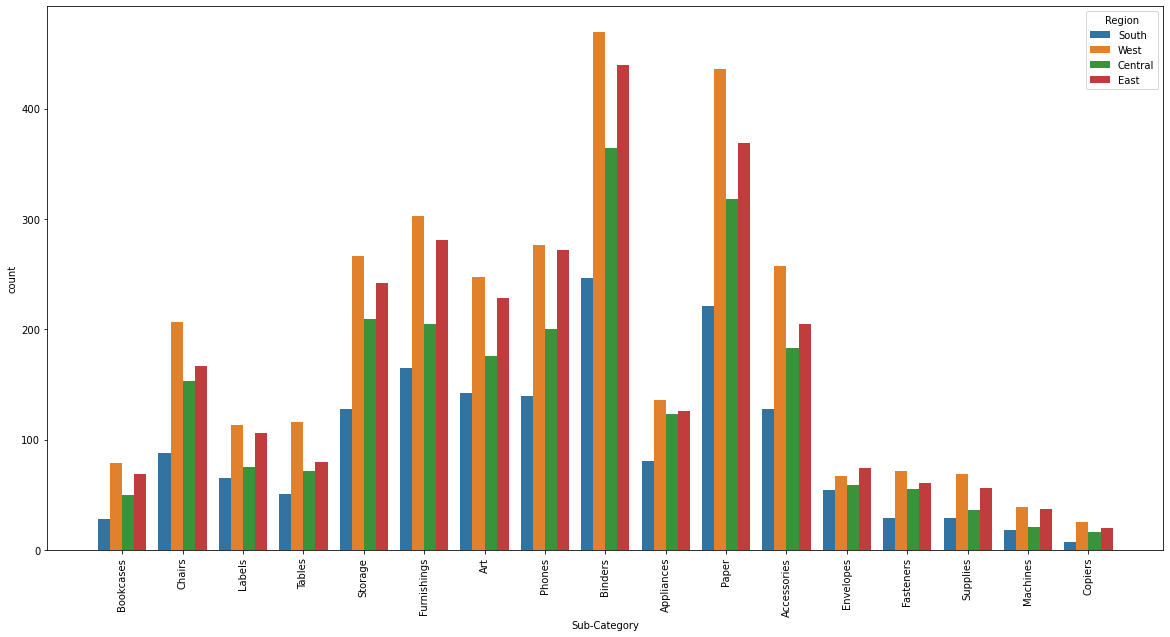

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(x="Sub-Category", hue= "Region", data=store)
plt.xticks(rotation="vertical")
plt.plot()

### Sales per state plots

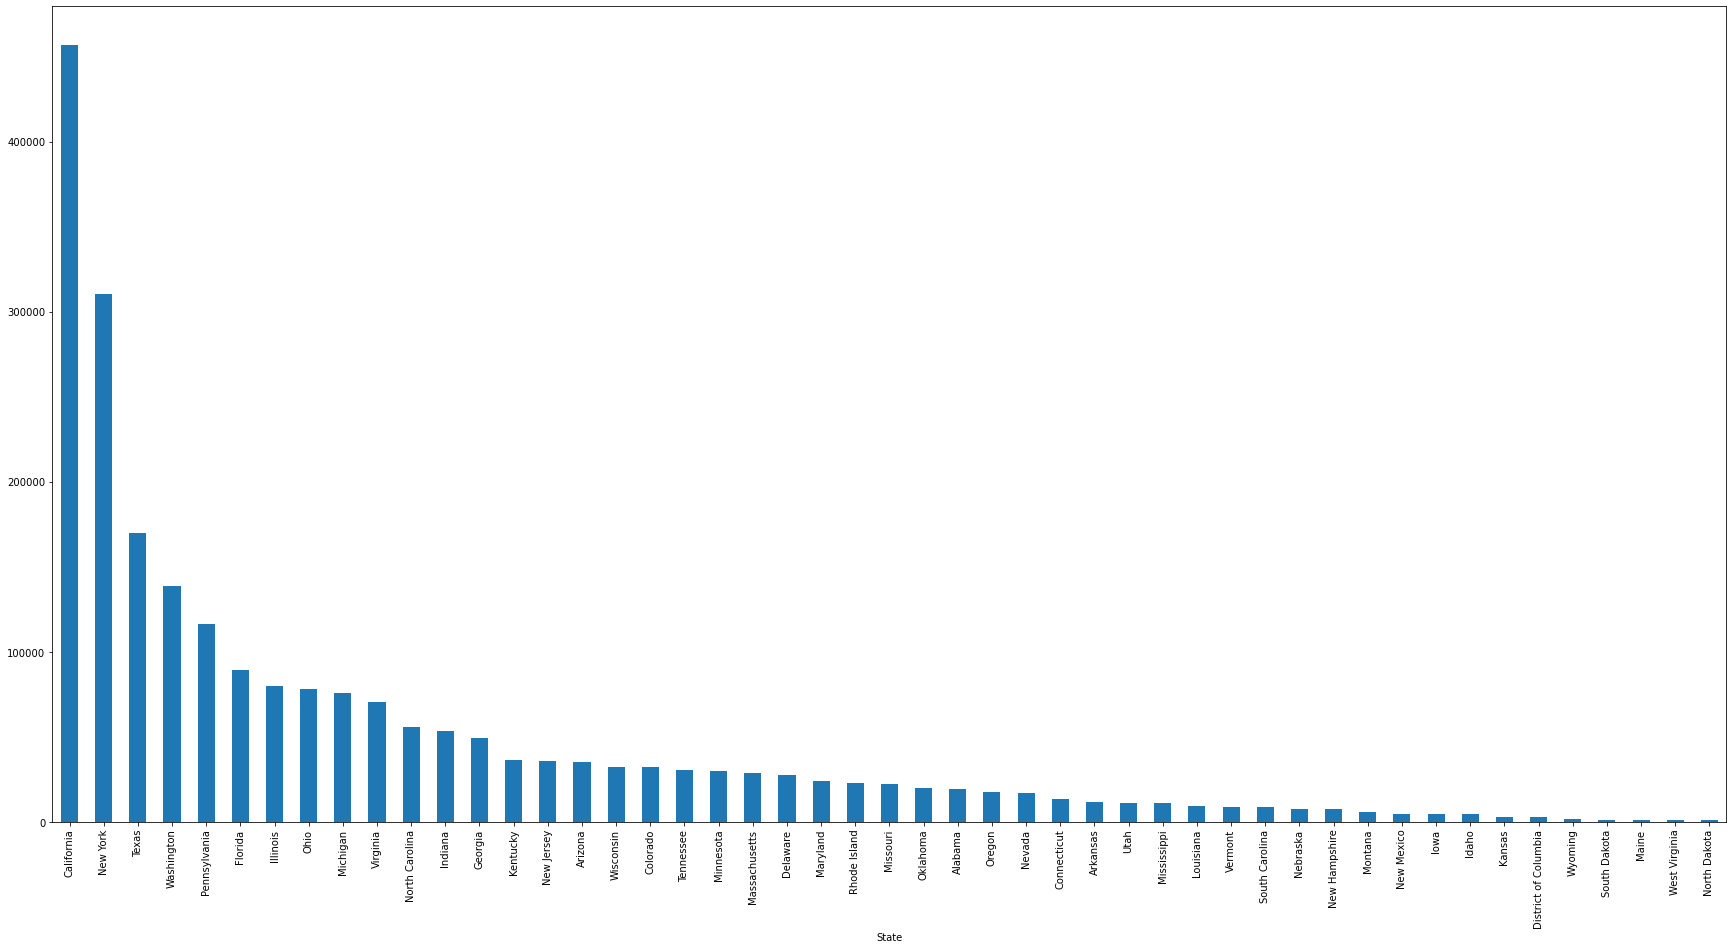

In [32]:
sales = store.groupby("State")["Sales"].sum().sort_values(ascending=False)
sales.plot.bar(figsize=(30,15))


Conclusion : States like California, New york and Texas are having highest sales while states like Maine , West Virginia and North Dakota have lowest sales.

### Profit and Sales for sub-categories

<ipython-input-33-d11ccb1f6056>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  category = store.groupby("Sub-Category")["Profit", "Sales"].sum()


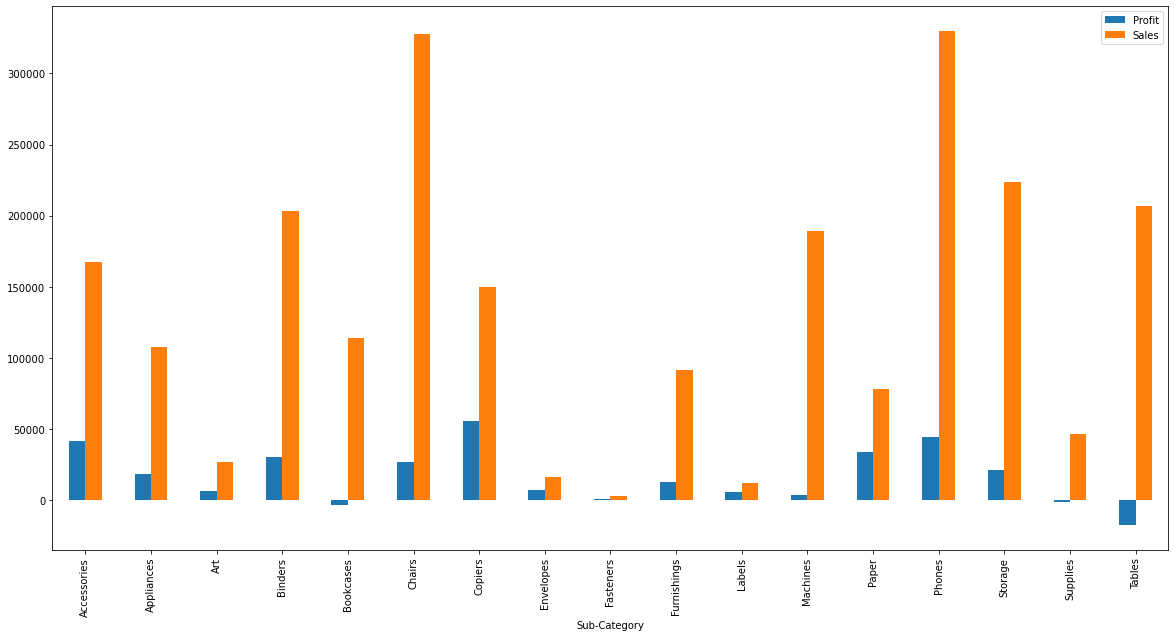

In [33]:
category = store.groupby("Sub-Category")["Profit", "Sales"].sum()
category.plot.bar(figsize=(20,10))

Conclusion :
 
1) We can see that although our sales is high as compared to our profit.

2) The best Sales vs Profit ratio is obtaining from copiers and paper.

3) When it comes to Tables, Bookcases and Supplies as comapred to our sales we are making losses.

### Weak Areas :


1) Though Copiers are the least sold products it makes most of the profit so, we must look for ways to improve the sales of the Copiers.

2)When it comes to selling tables we should stop selling tables as we are making losses otherwise we should imporove our ways in its sales.

3) We should try to imporve our sales in North Dakota, South Dakota , West Virginia and Columbia using new techniques.

4) Our sales at Illinois, Ohio, Texas and Pennsylvania are making losses so we must concentrate on the loss making issues in this region.



#### So , in order to improve our sales and profit we must pay special attention to our losses and strengthern our weak areas as mentioned above.